## Практична робота № 8 Жадібні алгоритми. Наближене розв’язання екстремальних задач
## Мета: набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.
### Виконав: Яцентюк Євгеній, група: КІ-24-1 

##### Мій Варіант 1 (23) = 23-22=**1**
Завдання(1): Заданий зважений граф: (1,7,15), (1,3,6), (1,5,7), (1,6,6), (1,2,4),
(2,4,10), (3,5,10),(3,7,5),(3,6,5), (4,7,3),(4,5,15),(5,6,5).

## 1. Програмна реалізація та Візуалізація

Оптимальний маршрут: [1, 2, 4, 7, 3, 6, 5]
Вартість маршруту: 39


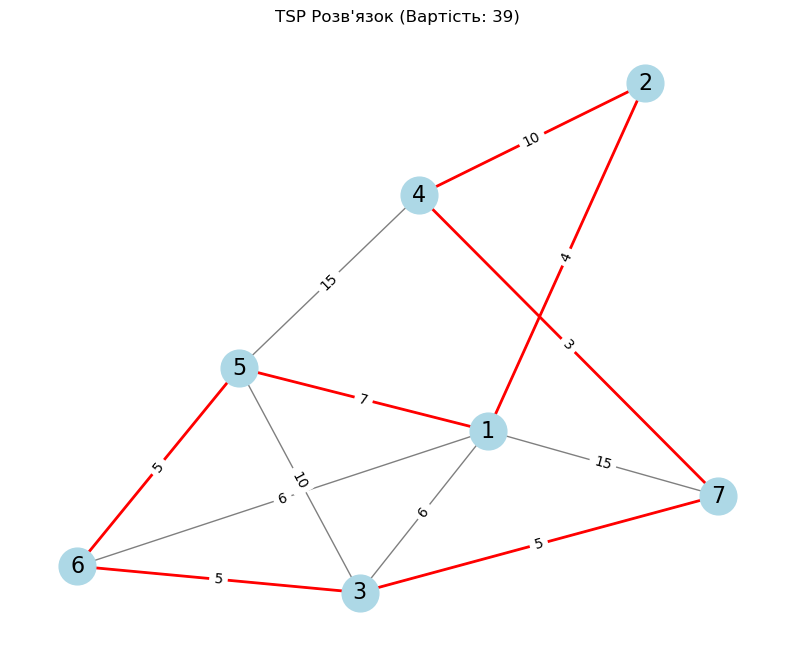

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

G = nx.Graph()
G.add_nodes_from(range(1, 8))
edges_data = [
    (1, 7, 15), (1, 3, 6), (1, 5, 7), (1, 6, 6), (1, 2, 4),
    (2, 4, 10),
    (3, 5, 10), (3, 7, 5), (3, 6, 5),
    (4, 7, 3), (4, 5, 15),
    (5, 6, 5)
]
G.add_weighted_edges_from(edges_data)

# Алгоритм повного перебору
INFINITY = float('inf')

def get_path_length(G, path):
    path_length = 0
    for i, v1 in enumerate(path):
        v2 = path[(i + 1) % len(path)] 
        if not G.has_edge(v1, v2):
            return INFINITY
        path_length += G[v1][v2]["weight"]
    return path_length

def node_permutations(G, init_node):
    nodes = list(G.nodes())
    nodes.remove(init_node)
    return [[init_node] + list(p) for p in permutations(nodes)]

def TSP_BruteForce(G, init_node):
    min_path = None
    min_path_length = INFINITY
    
    # Перебираємо всі можливі маршрути
    for path in node_permutations(G, init_node):
        current_len = get_path_length(G, path)
        if current_len < min_path_length:
            min_path_length = current_len
            min_path = path
            
    return min_path, min_path_length

start_node = 1
best_route, best_cost = TSP_BruteForce(G, start_node)

print(f"Оптимальний маршрут: {best_route}")
print(f"Вартість маршруту: {best_cost}")
# Візуалізація графа
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42) 

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=16)

nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)

route_edges = []
for i in range(len(best_route)):
    u = best_route[i]
    v = best_route[(i + 1) % len(best_route)]
    route_edges.append((u, v))

nx.draw_networkx_edges(G, pos, edgelist=route_edges, width=2, edge_color='red')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"TSP Розв'язок (Вартість: {best_cost})")
plt.axis('off')
plt.show()

## 2. Обґрунтування асимптотики

1. Алгоритм грубої сили (Brute Force): $O(n!)$

  * **Суть:** Ми намагаємось знайти найкращий порядок відвідування міст.
  * **Чому факторіал:** Якщо у нас є $n$ міст, ми фіксуємо перше місто (старт). Для другого міста у нас є $(n-1)$ варіантів, для третього — $(n-2)$ варіантів, і так далі.
  * Кількість можливих перестановок (маршрутів) дорівнює $(n-1)!$. Оскільки при великих $n$ різниця між $n!$ та $(n-1)!$ не змінює клас складності, загальна складність оцінюється як **факторіальна** — $O(n!)$. Це дуже повільно. Для 20 міст комп'ютер може рахувати роками.

2. Алгоритм найближчого сусіда (Nearest Neighbor): $O(n^2)$

  * **Суть:** Жадібний підхід. Знаходячись у поточному місті, ми просто шукаємо найближче наступне, яке ще не відвідали.
  * **Чому квадрат:**
    1.  Ми повинні відвідати кожне з $n$ міст (зовнішній цикл виконується $n$ разів).
    2.  На кожному кроці ми переглядаємо список доступних сусідів, щоб знайти мінімальну відстань. У найгіршому випадку це ще близько $n$ операцій порівняння.
  * Множимо кількість кроків на кількість порівнянь: $n \times n = n^2$. Це **квадратична складність**, яка працює дуже швидко навіть для тисяч міст, але не гарантує найкращого результату.


### Порівняльна характеристика алгоритмів

| Алгоритм | Асимптотична складність | Тип розв'язку | Швидкодія |
| :--- | :--- | :--- | :--- |
| **Повний перебір (Brute Force)** | $O(n!)$ | **Точний** (гарантовано найкоротший шлях) | Дуже низька (непридатний для $N > 15$) |
| **Найближчий сусід (Greedy)** | $O(n^2 \cdot \log n)$ | **Наближений** (шлях може бути не ідеальним) | Дуже висока (працює миттєво для великих $N$) |

## Відповіді на контрольні питання 

**1. Що таке жадібний алгоритм?**

**Жадібний алгоритм** — це евристичний метод розв’язання задач, який на кожному кроці приймає рішення, що здається найкращим (оптимальним) у даний конкретний момент.
Його суть полягає в тому, щоб робити **локально оптимальний вибір** у надії, що ця послідовність виборів призведе до **глобально оптимального** рішення всієї задачі.

**2. Які головні принципи роботи жадібних алгоритмів?**

В основі роботи жадібних алгоритмів лежать два ключові принципи:
1.  **Властивість жадібного вибору:** Глобального оптимуму можна досягти, роблячи локально оптимальні кроки (жадібні вибори). Тобто ми вибираємо найкращий варіант зараз і не переймаємося тим, як це вплине на майбутні кроки.
2.  **Оптимальна підструктура:** Оптимальний розв’язок задачі складається з оптимальних розв’язків її підзадач.

**3. Яка головна відмінність між жадібними алгоритмами та динамічним програмуванням?**

Це найважливіше питання. Різниця у **стратегії прийняття рішень**:

* **Жадібні алгоритми:** Роблять вибір **одразу** і **незворотно**. Вони не переглядають свої рішення і не повертаються назад. Це працює швидше, але не завжди дає точний результат.
* **Динамічне програмування:** Розглядає **всі можливі варіанти** (або комбінації підзадач), часто "знизу вгору". Воно гарантує знаходження найкращого рішення, оскільки враховує наслідки кожного вибору, але вимагає значно більше пам’яті та часу.

**4. Наведіть приклади задач, які можна розв’язати за допомогою жадібних алгоритмів.**

Жадібні алгоритми дають точний розв’язок для таких класичних задач:
* **Задача про рюкзак (дробова версія):** Коли предмети можна ділити на частини.
* **Алгоритм Дейкстри:** Пошук найкоротшого шляху в графі (без від’ємних ребер).
* **Алгоритми Прима та Краскала:** Побудова мінімального кістякового дерева (об'єднання точок мінімальною довжиною ліній).
* **Коди Гаффмана:** Стиснення даних (оптимальне кодування).
* **Задача про вибір заявок (Activity Selection):** Вибір максимальної кількості сумісних подій.

**5. Які можуть бути обмеження у використанні жадібних алгоритмів для розв'язання екстремальних задач?**

* **Відсутність глобального оптимуму:** Для багатьох задач (наприклад, задача комівояжера або класична задача про рюкзак 0/1) жадібний підхід дає лише наближений, а не найкращий результат.
* **Неможливість скасувати хід:** Якщо на початку алгоритм зробив помилковий "жадібний" вибір, виправити це пізніше неможливо.
* **Залежність від умови:** Вони працюють коректно тільки для задач, що мають "матроїдну структуру" (специфічна математична властивість).

**6. Чому жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач?**

Вони використовуються там, де знайти точний розв’язок неможливо за розумний час (NP-складні задачі), через дві головні переваги:
1.  **Швидкодія (Ефективність):** Жадібні алгоритми зазвичай мають поліноміальну складність (наприклад, $O(n^2)$ або $O(n \log n)$), що дозволяє отримувати результат миттєво навіть для великих даних. Точні алгоритми (як перебір) можуть мати експоненціальну складність ($O(2^n)$ або $O(n!)$) і працювати роками.
2.  **Простота реалізації:** Їх набагато легше програмувати та налагоджувати, ніж складні методи перебору чи динамічного програмування.
